# **KogSys-ML-B: Einführung in Maschinelles Lernen**
## **Multi-Layer Perceptron**
---

To set up a new conda environment suitable for this notebook, you can use the following console commands:

```bash
conda create -y -n mlp python=3.13
conda activate mlp
python -m pip install -r requirements.txt
```

**Note**: Conda can become very hard-drive hungry when you use many environments. Consider regularly deleting environments you no longer need and running the ``conda clean --all`` command to remove no longer needed packages and cached files.

You can also install the requirements for this notebook into an existing environment by running the cell below:

In [1]:
# !python -m pip install -q -U -r requirements.txt

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, metrics, neural_network
from sklearn.model_selection import train_test_split

### **Dataset**

The following cell loads the MNIST dataset and visualizes examples. You can expect a longer runtime for this cell when you run it for the first time, as the dataset needs to be downloaded. In testing, it took around 30s.

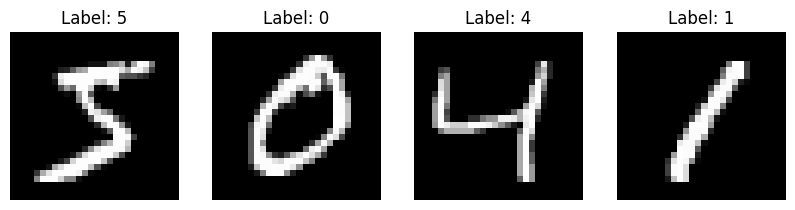

In [3]:
X, y = datasets.fetch_openml("mnist_784", version = 1, return_X_y = True, as_frame = False)

_, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (10, 3))
for ax, img, lab in zip(axes, X.reshape((-1, 28, 28)), y):
    ax.set_axis_off()
    ax.imshow(img, cmap = plt.cm.gray, interpolation="nearest")
    ax.set_title(f"Label: {lab}")

### **Training**

This is where you come in: In the next cell, split your dataset into training and test sets (use 20% test data), and train an ``MLPClassifier`` on your training data. Use two hidden layers of 50 units each, the sigmoid function as activation, and stochastic gradient descent as the training method.

In [4]:
X = X.astype(np.float32) / 255
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 42)

mlp = neural_network.MLPClassifier((50, 50), activation = "logistic", solver = "sgd")

mlp = mlp.fit(X_train, y_train)

/opt/homebrew/Caskroom/miniconda/base/envs/ml2526/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### **Evaluation**

Finally, evaluate the model you trained. Do each of the following:
1. Calculate the models accuracy on the test set
2. Calculate the models average f1-score on the test set
3. Visualize some predictions on the test set by adapting the visualization code from above
4. Calculate a confusion matrix and display it as a heatmap using ``matplotlib``

In [5]:
metrics.accuracy_score(y_test, mlp.predict(X_test))

0.9217857142857143

In [6]:
metrics.f1_score(y_test, mlp.predict(X_test), average = "weighted")

0.9216089710526401

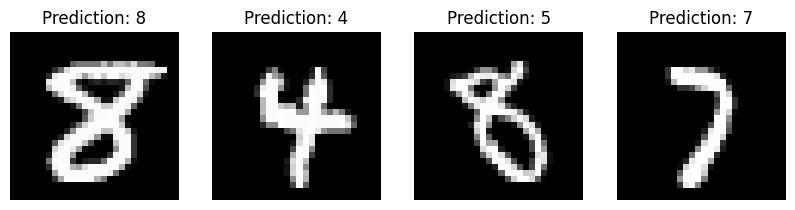

In [7]:
_, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (10, 3))
for ax, img, lab in zip(axes, X_test.reshape((-1, 28, 28)), mlp.predict(X_test)):
    ax.set_axis_off()
    ax.imshow(img, cmap = plt.cm.gray, interpolation="nearest")
    ax.set_title(f"Prediction: {lab}")

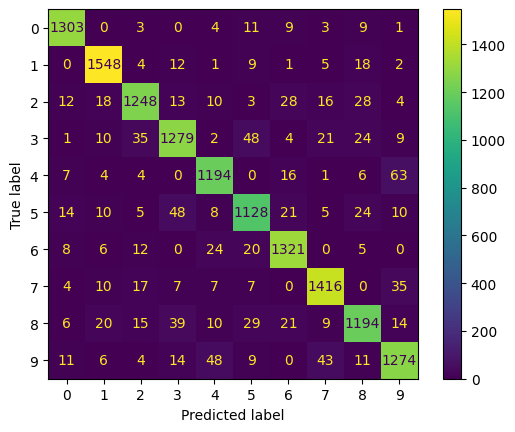

In [8]:
matr = metrics.ConfusionMatrixDisplay.from_predictions(y_test, mlp.predict(X_test))